In [36]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Time handling
from datetime import datetime

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [37]:
# Load 1-minute futures data
file_path = "../data/data_Y_M_1min.csv"
df = pd.read_csv(file_path)

In [38]:
# Preview first few rows
df.head()

,order_book_id,datetime,trading_date,close,volume,low,high,total_turnover,open,open_interest
0,Y2007,2020-01-02 09:01:00,2020-01-02,6684.0,0.0,6684.0,6684.0,0.0,6684.0,416.0
1,Y2007,2020-01-02 09:02:00,2020-01-02,6684.0,0.0,6684.0,6684.0,0.0,6684.0,416.0
2,Y2007,2020-01-02 09:03:00,2020-01-02,6684.0,0.0,6684.0,6684.0,0.0,6684.0,416.0
3,Y2007,2020-01-02 09:04:00,2020-01-02,6684.0,0.0,6684.0,6684.0,0.0,6684.0,416.0
4,Y2007,2020-01-02 09:05:00,2020-01-02,6684.0,0.0,6684.0,6684.0,0.0,6684.0,416.0


In [39]:
# Basic info and column types
df.info()

# Check for nulls
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079070 entries, 0 to 7079069
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   order_book_id   object 
 1   datetime        object 
 2   trading_date    object 
 3   close           float64
 4   volume          float64
 5   low             float64
 6   high            float64
 7   total_turnover  float64
 8   open            float64
 9   open_interest   float64
dtypes: float64(7), object(3)
memory usage: 540.1+ MB


order_book_id     0
datetime          0
trading_date      0
close             0
volume            0
low               0
high              0
total_turnover    0
open              0
open_interest     0
dtype: int64

In [40]:
# Convert datetime column to pandas datetime format
df['datetime'] = pd.to_datetime(df['datetime'])
df['trading_date'] = pd.to_datetime(df['trading_date'])

# Sort just in case
df = df.sort_values(by=['order_book_id', 'datetime']).reset_index(drop=True)

In [41]:
# Split the dataset into Y and M futures
df_Y = df[df['order_book_id'].str.startswith('Y')].copy()
df_M = df[df['order_book_id'].str.startswith('M')].copy()

# Check basic shape and preview
print("Y futures:", df_Y.shape)
print("M futures:", df_M.shape)

df_Y.head()

Y futures: (3539535, 10)
M futures: (3539535, 10)


,order_book_id,datetime,trading_date,close,volume,low,high,total_turnover,open,open_interest
3539535,Y2001,2020-01-02 09:01:00,2020-01-02,7140.0,7.0,7140.0,7140.0,499800.0,7140.0,3912.0
3539536,Y2001,2020-01-02 09:02:00,2020-01-02,7138.0,103.0,6440.0,7140.0,6654440.0,7140.0,3827.0
3539537,Y2001,2020-01-02 09:03:00,2020-01-02,6698.0,8.0,6698.0,7138.0,539860.0,7138.0,3819.0
3539538,Y2001,2020-01-02 09:04:00,2020-01-02,6698.0,0.0,6698.0,6698.0,0.0,6698.0,3819.0
3539539,Y2001,2020-01-02 09:05:00,2020-01-02,6698.0,0.0,6698.0,6698.0,0.0,6698.0,3819.0


In [42]:
# Set datetime as index for both
df_Y.set_index('datetime', inplace=True)
df_M.set_index('datetime', inplace=True)

# Select only the closing prices and rename columns for clarity
y_close = df_Y[['close']].rename(columns={'close': 'Y_close'})
m_close = df_M[['close']].rename(columns={'close': 'M_close'})

# Merge on datetime index
spread_df = pd.merge(y_close, m_close, left_index=True, right_index=True, how='inner')

# Preview merged spread dataframe
spread_df.head()

,Y_close,M_close
datetime,,
2020-01-02 09:01:00,7140.0,2632.0
2020-01-02 09:01:00,7140.0,2692.0
2020-01-02 09:01:00,7140.0,2780.0
2020-01-02 09:01:00,7140.0,2801.0
2020-01-02 09:01:00,7140.0,2848.0


In [43]:
print("Unique Y contracts:", df_Y['order_book_id'].unique())
print("Unique M contracts:", df_M['order_book_id'].unique())

Unique Y contracts: ['Y2001' 'Y2003' 'Y2005' 'Y2007' 'Y2008' 'Y2009' 'Y2011' 'Y2012' 'Y2101'
 'Y2103' 'Y2105' 'Y2107' 'Y2108' 'Y2109' 'Y2111' 'Y2112' 'Y2201' 'Y2203'
 'Y2205' 'Y2207' 'Y2208' 'Y2209' 'Y2211' 'Y2212' 'Y2301' 'Y2303' 'Y2305'
 'Y2307' 'Y2308' 'Y2309' 'Y2311' 'Y2312' 'Y2401' 'Y2403' 'Y2405' 'Y2407'
 'Y2408' 'Y2409' 'Y2411' 'Y2412' 'Y2501' 'Y2503' 'Y2505' 'Y2507' 'Y2508'
 'Y2509' 'Y2511' 'Y2512' 'Y2601' 'Y2603' 'Y2605']
Unique M contracts: ['M2001' 'M2003' 'M2005' 'M2007' 'M2008' 'M2009' 'M2011' 'M2012' 'M2101'
 'M2103' 'M2105' 'M2107' 'M2108' 'M2109' 'M2111' 'M2112' 'M2201' 'M2203'
 'M2205' 'M2207' 'M2208' 'M2209' 'M2211' 'M2212' 'M2301' 'M2303' 'M2305'
 'M2307' 'M2308' 'M2309' 'M2311' 'M2312' 'M2401' 'M2403' 'M2405' 'M2407'
 'M2408' 'M2409' 'M2411' 'M2412' 'M2501' 'M2503' 'M2505' 'M2507' 'M2508'
 'M2509' 'M2511' 'M2512' 'M2601' 'M2603' 'M2605']


In [44]:
# Filter only one contract for Y and M (e.g., Jan 2020 contracts)
df_Y_active = df_Y[df_Y['order_book_id'] == 'Y2003'].copy()
df_M_active = df_M[df_M['order_book_id'] == 'M2003'].copy()

In [45]:
print(df_Y_active.head())
df_M_active.head()

                    order_book_id trading_date   close  volume     low    high  total_turnover    open  open_interest
datetime                                                                                                             
2020-01-02 09:01:00         Y2003   2020-01-02  6778.0     0.0  6778.0  6778.0             0.0  6778.0          417.0
2020-01-02 09:02:00         Y2003   2020-01-02  6778.0     0.0  6778.0  6778.0             0.0  6778.0          417.0
2020-01-02 09:03:00         Y2003   2020-01-02  6778.0     0.0  6778.0  6778.0             0.0  6778.0          417.0
2020-01-02 09:04:00         Y2003   2020-01-02  6778.0     0.0  6778.0  6778.0             0.0  6778.0          417.0
2020-01-02 09:05:00         Y2003   2020-01-02  6778.0     0.0  6778.0  6778.0             0.0  6778.0          417.0


,order_book_id,trading_date,close,volume,low,high,total_turnover,open,open_interest
datetime,,,,,,,,,
2020-01-02 09:01:00,M2003,2020-01-02,2692.0,648.0,2683.0,2693.0,17431860.0,2688.0,277138.0
2020-01-02 09:02:00,M2003,2020-01-02,2690.0,144.0,2690.0,2692.0,3875600.0,2692.0,277174.0
2020-01-02 09:03:00,M2003,2020-01-02,2695.0,338.0,2690.0,2695.0,9099990.0,2690.0,277272.0
2020-01-02 09:04:00,M2003,2020-01-02,2696.0,566.0,2695.0,2697.0,15256730.0,2696.0,277562.0
2020-01-02 09:05:00,M2003,2020-01-02,2698.0,681.0,2696.0,2699.0,18365090.0,2696.0,277866.0


In [46]:
# Select close prices only
y_close = df_Y_active[['close']].rename(columns={'close': 'Y_close'})
m_close = df_M_active[['close']].rename(columns={'close': 'M_close'})

In [47]:
# Inner join to align both on matching timestamps
spread_df = pd.merge(y_close, m_close, left_index=True, right_index=True, how='inner')

# Sanity check
spread_df.head(10)

,Y_close,M_close
datetime,,
2020-01-02 09:01:00,6778.0,2692.0
2020-01-02 09:02:00,6778.0,2690.0
2020-01-02 09:03:00,6778.0,2695.0
2020-01-02 09:04:00,6778.0,2696.0
2020-01-02 09:05:00,6778.0,2698.0
2020-01-02 09:06:00,6778.0,2694.0
2020-01-02 09:07:00,6778.0,2687.0
2020-01-02 09:08:00,6778.0,2690.0
2020-01-02 09:09:00,6778.0,2688.0


In [48]:
spread_df['price_spread'] = spread_df['Y_close'] - spread_df['M_close']
spread_df['price_ratio'] = spread_df['Y_close'] / spread_df['M_close']

spread_df[['Y_close', 'M_close', 'price_spread', 'price_ratio']].head()

,Y_close,M_close,price_spread,price_ratio
datetime,,,,
2020-01-02 09:01:00,6778.0,2692.0,4086.0,2.517831
2020-01-02 09:02:00,6778.0,2690.0,4088.0,2.519703
2020-01-02 09:03:00,6778.0,2695.0,4083.0,2.515028
2020-01-02 09:04:00,6778.0,2696.0,4082.0,2.514095
2020-01-02 09:05:00,6778.0,2698.0,4080.0,2.512231


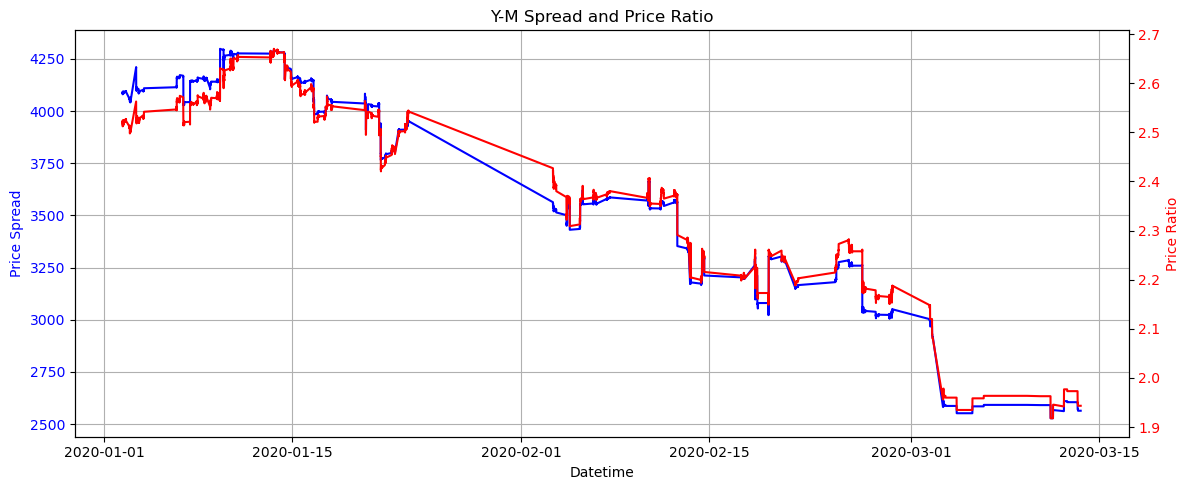

In [49]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot the spread on the left y-axis
ax1.plot(spread_df.index, spread_df['price_spread'], label='Price Spread', color='blue')
ax1.set_xlabel('Datetime')
ax1.set_ylabel('Price Spread', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right
ax2 = ax1.twinx()
ax2.plot(spread_df.index, spread_df['price_ratio'], label='Price Ratio', color='red')
ax2.set_ylabel('Price Ratio', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and grid
plt.title('Y-M Spread and Price Ratio')
ax1.grid(True)

plt.tight_layout()
plt.show()

In [50]:
def compute_zscore(series, window=60):
    mean = series.rolling(window=window).mean()
    std = series.rolling(window=window).std()
    zscore = (series - mean) / std
    return zscore

In [51]:
spread_df['zscore_spread'] = compute_zscore(spread_df['price_spread'], window=60)
spread_df[['price_spread', 'zscore_spread']].dropna().head(10)

,price_spread,zscore_spread
datetime,,
2020-01-02 10:00:00,4085.0,-0.722516
2020-01-02 10:01:00,4082.0,-1.596925
2020-01-02 10:02:00,4083.0,-1.251732
2020-01-02 10:03:00,4083.0,-1.251732
2020-01-02 10:04:00,4084.0,-0.974995
2020-01-02 10:05:00,4084.0,-1.029435
2020-01-02 10:06:00,4083.0,-1.329408
2020-01-02 10:07:00,4085.0,-0.680372
2020-01-02 10:08:00,4086.0,-0.355709


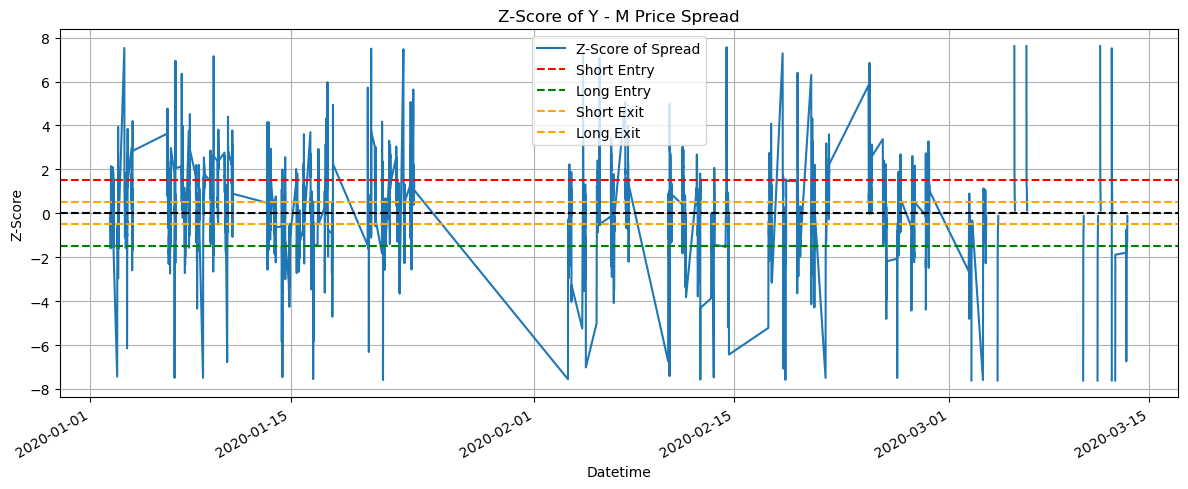

In [52]:
plt.figure(figsize=(12, 5))
spread_df['zscore_spread'].plot(label='Z-Score of Spread')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(1.5, color='red', linestyle='--', label='Short Entry')
plt.axhline(-1.5, color='green', linestyle='--', label='Long Entry')
plt.axhline(0.5, color='orange', linestyle='--', label='Short Exit')
plt.axhline(-0.5, color='orange', linestyle='--', label='Long Exit')
plt.title("Z-Score of Y - M Price Spread")
plt.xlabel("Datetime")
plt.ylabel("Z-Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
# Reuse same function
spread_df['zscore_ratio'] = compute_zscore(spread_df['price_ratio'], window=60)
spread_df[['price_ratio', 'zscore_ratio']].dropna().head()

,price_ratio,zscore_ratio
datetime,,
2020-01-02 10:00:00,2.516896,-0.723224
2020-01-02 10:01:00,2.514095,-1.595354
2020-01-02 10:02:00,2.515028,-1.251211
2020-01-02 10:03:00,2.515028,-1.251211
2020-01-02 10:04:00,2.515961,-0.975174


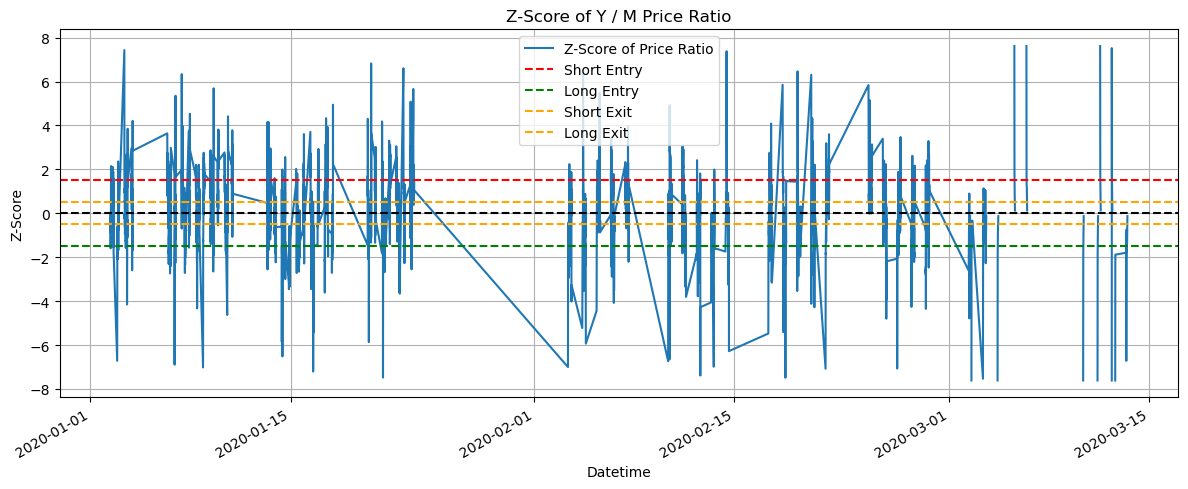

In [54]:
plt.figure(figsize=(12, 5))
spread_df['zscore_ratio'].plot(label='Z-Score of Price Ratio')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(1.5, color='red', linestyle='--', label='Short Entry')
plt.axhline(-1.5, color='green', linestyle='--', label='Long Entry')
plt.axhline(0.5, color='orange', linestyle='--', label='Short Exit')
plt.axhline(-0.5, color='orange', linestyle='--', label='Long Exit')
plt.title("Z-Score of Y / M Price Ratio")
plt.xlabel("Datetime")
plt.ylabel("Z-Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
# Initialize position column
spread_df['position'] = 0

# Define thresholds
entry_threshold = 1.5
exit_threshold = 0.5

In [56]:
# Step 1: Generate signal column
spread_df['signal'] = np.nan
spread_df.loc[spread_df['zscore_ratio'] > entry_threshold, 'signal'] = -1
spread_df.loc[spread_df['zscore_ratio'] < -entry_threshold, 'signal'] = 1
spread_df.loc[spread_df['zscore_ratio'].abs() < exit_threshold, 'signal'] = 0

# Step 2: Forward fill signal → position
spread_df['position'] = spread_df['signal'].ffill().fillna(0)

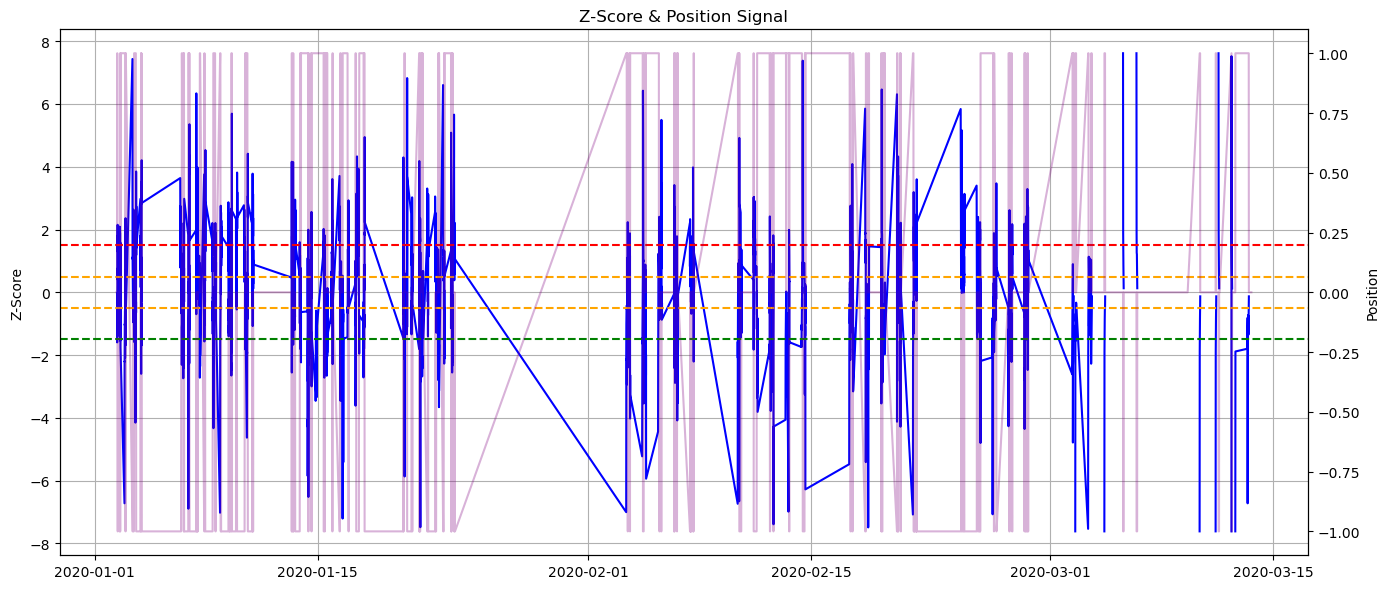

In [57]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot z-score
ax1.plot(spread_df.index, spread_df['zscore_ratio'], label='Z-Score', color='blue')
ax1.axhline(entry_threshold, color='red', linestyle='--')
ax1.axhline(-entry_threshold, color='green', linestyle='--')
ax1.axhline(exit_threshold, color='orange', linestyle='--')
ax1.axhline(-exit_threshold, color='orange', linestyle='--')
ax1.set_ylabel('Z-Score')
ax1.set_title("Z-Score & Position Signal")
ax1.grid(True)

# Plot positions on secondary axis
ax2 = ax1.twinx()
ax2.plot(spread_df.index, spread_df['position'], label='Position', color='purple', alpha=0.3)
ax2.set_ylabel('Position')

fig.tight_layout()
plt.show()

In [58]:
spread_df['ratio_return'] = spread_df['price_ratio'].pct_change()

spread_df['strategy_return'] = spread_df['position'].shift(1) * spread_df['ratio_return']

In [59]:
spread_df[['price_ratio', 'position', 'strategy_return']].dropna().head(10)

,price_ratio,position,strategy_return
datetime,,,
2020-01-02 09:02:00,2.519703,0.0,0.0
2020-01-02 09:03:00,2.515028,0.0,-0.0
2020-01-02 09:04:00,2.514095,0.0,-0.0
2020-01-02 09:05:00,2.512231,0.0,-0.0
2020-01-02 09:06:00,2.515961,0.0,0.0
2020-01-02 09:07:00,2.522516,0.0,0.0
2020-01-02 09:08:00,2.519703,0.0,-0.0
2020-01-02 09:09:00,2.521577,0.0,0.0
2020-01-02 09:10:00,2.523455,0.0,0.0


In [60]:
spread_df['cumulative_return'] = (1 + spread_df['strategy_return']).cumprod()

spread_df['log_return'] = np.log1p(spread_df['strategy_return'])
spread_df['cumulative_log_return'] = spread_df['log_return'].cumsum()

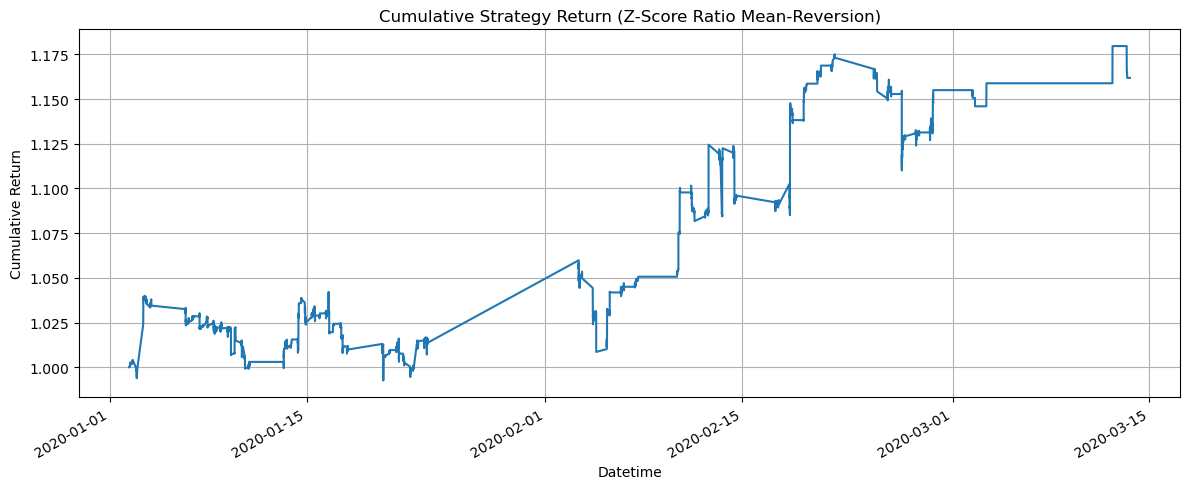

In [61]:
plt.figure(figsize=(12, 5))
spread_df['cumulative_return'].plot()
plt.title("Cumulative Strategy Return (Z-Score Ratio Mean-Reversion)")
plt.xlabel("Datetime")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.tight_layout()
plt.show()

In [62]:
# Drop NaNs in strategy return
returns = spread_df['strategy_return'].dropna()

# Compute Sharpe ratio (annualized)
mean_return = returns.mean()
std_return = returns.std()
annual_factor = np.sqrt(252 * 60 * 4)

sharpe_ratio = (mean_return / std_return) * annual_factor
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Sharpe Ratio: 2.81


In [63]:
# Compute rolling peak
rolling_max = spread_df['cumulative_return'].cummax()

# Compute drawdown series
drawdown = spread_df['cumulative_return'] / rolling_max - 1

# Compute max drawdown
max_drawdown = drawdown.min()
print(f"Max Drawdown: {max_drawdown:.2%}")

Max Drawdown: -5.52%


In [64]:
# Create a signal change column
spread_df['position_change'] = spread_df['position'].fillna(0).diff()

# Entry points: position changes from 0 to ±1
entry_points = spread_df[spread_df['position_change'].abs() == 1].copy()

# Exit points: position goes from ±1 to 0
exit_points = spread_df[spread_df['position_change'] == -spread_df['position'].shift(1)].copy()

print(f"Number of Trades: {len(exit_points)}")

Number of Trades: 5906


In [65]:
# Ensure datetime is a normal column
spread_df = spread_df.reset_index()

trades = []
in_trade = False
entry_time = None
entry_pos = None
entry_index = None

for idx, row in spread_df.iterrows():
    current_pos = row['position']
    
    # If not in a trade and we get an entry signal
    if not in_trade and current_pos != 0:
        in_trade = True
        entry_time = row['datetime']
        entry_pos = current_pos
        entry_index = idx
    
    # If in a trade and signal drops to zero (exit)
    elif in_trade and current_pos == 0:
        exit_time = row['datetime']
        exit_index = idx
        
        # Calculate cumulative return for this trade
        trade_slice = spread_df.loc[entry_index:exit_index]
        trade_return = (1 + trade_slice['strategy_return']).prod() - 1
        duration = (exit_time - entry_time).total_seconds() / 60  # in minutes
        
        trades.append({
            'entry_time': entry_time,
            'exit_time': exit_time,
            'position': entry_pos,
            'return': trade_return,
            'duration_min': duration
        })
        
        # Reset state
        in_trade = False
        entry_time = None
        entry_pos = None
        entry_index = None

In [66]:
# Convert to DataFrame
trades_df = pd.DataFrame(trades)

# Show first few trades
trades_df.head()

,entry_time,exit_time,position,return,duration_min
0,2020-01-02 10:01:00,2020-01-02 10:08:00,1.0,0.001486,7.0
1,2020-01-02 10:37:00,2020-01-02 10:58:00,-1.0,0.001113,21.0
2,2020-01-02 13:35:00,2020-01-02 14:04:00,-1.0,-0.000001,29.0
3,2020-01-02 14:19:00,2020-01-02 14:37:00,-1.0,0.000745,18.0
4,2020-01-02 14:41:00,2020-01-02 14:44:00,1.0,0.000745,3.0


In [67]:
# Total number of trades
total_trades = len(trades_df)

# Number of winning trades
winning_trades = (trades_df['return'] > 0).sum()

# Win rate
win_rate = winning_trades / total_trades

# Average return per trade
avg_return = trades_df['return'].mean()

print(f"Total trades: {total_trades}")
print(f"Winning trades: {winning_trades}")
print(f"Win rate: {win_rate:.2%}")
print(f"Average return per trade: {avg_return:.4f}")

Total trades: 202
Winning trades: 132
Win rate: 65.35%
Average return per trade: 0.0008


In [68]:
# Separate long and short trades
long_trades = trades_df[trades_df['position'] == 1]
short_trades = trades_df[trades_df['position'] == -1]

# Long trade stats
long_count = len(long_trades)
long_win_rate = (long_trades['return'] > 0).mean()
long_avg_return = long_trades['return'].mean()

# Short trade stats
short_count = len(short_trades)
short_win_rate = (short_trades['return'] > 0).mean()
short_avg_return = short_trades['return'].mean()

print(f"Long trades: {long_count} | Win rate: {long_win_rate:.2%} | Avg return: {long_avg_return:.4f}")
print(f"Short trades: {short_count} | Win rate: {short_win_rate:.2%} | Avg return: {short_avg_return:.4f}")

Long trades: 99 | Win rate: 63.64% | Avg return: 0.0010
Short trades: 103 | Win rate: 66.99% | Avg return: 0.0006


In [69]:
# Average duration (in minutes)
avg_duration = trades_df['duration_min'].mean()

# Median duration
median_duration = trades_df['duration_min'].median()

# Min and max duration
min_duration = trades_df['duration_min'].min()
max_duration = trades_df['duration_min'].max()

print(f"Average holding duration: {avg_duration:.2f} minutes")
print(f"Median holding duration: {median_duration:.2f} minutes")
print(f"Shortest trade: {min_duration:.2f} minutes")
print(f"Longest trade: {max_duration:.2f} minutes")

Average holding duration: 296.30 minutes
Median holding duration: 29.00 minutes
Shortest trade: 1.00 minutes
Longest trade: 15565.00 minutes


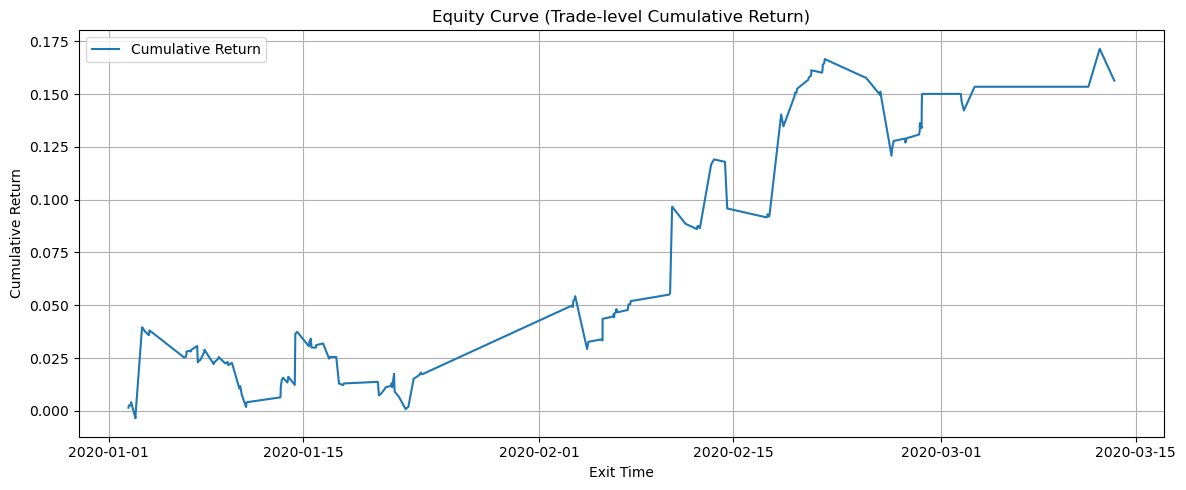

In [70]:
# Make sure 'exit_time' is datetime type
trades_df['exit_time'] = pd.to_datetime(trades_df['exit_time'])

# Sort trades chronologically by exit
trades_df = trades_df.sort_values('exit_time')

# Compute cumulative return (not compounded for now)
trades_df['cumulative_return'] = trades_df['return'].cumsum()

# Plot the equity curve
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(trades_df['exit_time'], trades_df['cumulative_return'], label='Cumulative Return')
plt.xlabel("Exit Time")
plt.ylabel("Cumulative Return")
plt.title("Equity Curve (Trade-level Cumulative Return)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()